# Introduction to CyberGIS-Compute

**Authors:** Zimo Xiao zimox2@illinois.edu, Furqan Baig fbaig@illinois.edu, Rebecca Vandewalle rcv3@illinois.edu, and Anand Padmanabhan apadmana@illinois.edu
<br>**Last Updated:** 7-14-21

CyberGIS-Compute enables students and researchers from diverse backgrounds to take advantage of High Performance Computing (HPC) resources without having to delve into the details of system setup, maintenance and management. It is backed by Virtual ROGER (Resourcing Open Geospatial Education and Research); a geospatial supercomputer with access to a number of readily available popular geospatial libraries.

A major goal of CyberGISX is to provide its users with straightforward access software tools, libraries and computational resources for reproducible geospatial research and educataion, so they may focus their effort on research and application development activities, instead software installation and system engineeting. With CyberGIS-Compute powerful HPC resources are made easily accessible on CyberGISX so its users can leverage these prowerful computational resource for geospatial problem solving with minimal effort and low learning curve.

In example 1: the hello world example, we will learn
- The basics of the CyberGIS-Compute environment
- The life cycle of a typical job in CyberGIS-Compute
- How to run a simple `Hello World` example on HPC using CyberGIS-Compute

In example 2: the custom code example, we will learn
- How to connect to custom code to CyberGIS-Compute
- How to run a job with custom code on HPC using CyberGIS-Compute

## Contents
- [Prerequisites](#prereqs)
- [Setup](#setup)
- [CyberGISX terminologies](#terminologies)
- [Example 1: Hello World - Running Prepackaged Code using CyberGIS-Compute](#example1)
    - [Import the CyberGIS-Compute client](#import_client)
    - [Create a CyberGIS-Compute object](#create_object)
    - [List HPC resources](#list_hpc)
    - [List maintainers](#list_maintainers)
    - [Create an HPC job](#create_job)
    - [Submit the HPC job](#submit_job)
    - [View job events](#view_events)
    - [View job logs](#view_logs)
- [Example 2: Running Custom Code using CyberGIS-Compute](#example2)
    - [Creating a community contribution job](#create_comm_job)
    - [Accessing custom code](#accessing)
    - [Stages of execution](#stages)
    - [Configuring the manifest file](#manifest)
    - [Specifying the custom code repository](#specifying)
    - [Submitting the job and tracking progress](#submit_and_track)
- [Example 3: Using CyberGIS-Compute to run a Spatial Accessibility Computation](#example3)
    - [Review available resources](#review)
    - [Submit the job](#submit_accessibility)
    - [Download results](#download_results)
    - [Display results](#display_results)

<a id='prereqs'></a>
## Prerequisites
To best understand this notebook, you should ideally have:
- Experience working with Jupyter Notebooks
- Familiarity with the Python programming language
- Familiarity with the Git repositories

<a id='setup'></a>
## Setup
Run the following code cell to set up our work environment. Essentially this sets up CyberGIS-Compute, the backend 
software development kit (SDK) to be able to access and work with High Performance Computing (HPC) resources for Python 3.

Note: This will generate considerable text output the first time you execute it in a session since resources are being downloaded and installed.

In [6]:
# Try to load CyberGIS-Compute client
try:
    from cybergis_compute_client import CyberGISCompute
    
# If not already setup, setup CyberGIS-Compute in the current Jupyter kernel
except:
    import sys
    !{sys.executable} -m pip install git+https://github.com/cybergis/job-supervisor-python-sdk.git@v2

<a id='terminologies'></a>
## CyberGIS-Compute terminologies

Before we get to the example, it is helpful to introduce some key terms.

A typical High Performance Computing (HPC) job in CyberGISX using CyberGIS-Compute consists of the following major components. These are illustrated in the following image and described more below.

![](cybergisx_flow.png)

- CyberGIS-Compute
    - This is an entry point to the CyberGISX environment from a Python/Jupyter notebook. 
    All interactions with the High Performance Computing (HPC) backend are performed using this object.
- Maintainer
    - CyberGIS-Compute provides a set of predefined ways to connect to a number of High Performance Computing (HPC) backends. These are termed  `Maintainers`.
    - `Maintainers` are essentially pre-packaged programs which can be configured and controlled remotely and behave as bridges between users and High Performance Computing backends.
    - Every `Maintainer` is connected to one of the available HPC backend resources. 
    - Users can submit jobs to respective HPC backends and monitor their progress via `Maintainers`.
- High Performance Computing (HPC) Resources
    - These are backend resources which typically require considerable effort to setup and maintain
    - The details of working with these resources are abstracted from users
    - These include a number of popular geospatial libraries
- CyberGIS-Compute SDK (Software Development Kit)
    - The CyberGIS-Compute SDK provide an application programming interface (API) for creating the CyberGIS-compute objects for submitting computational tasks to HPC resources, monitoring such tasks and downlioading results after the execution of the tasks on remote HPC resources"

<a id='example1'></a>
## Example 1: Hello World - Running Prepackaged Code using CyberGIS-Compute

To gain familiarity with the CyberGIS-Compute environment, we present a simple `Hello World` example in this notebook. We will learn how to write code to initialize and work with some of the CyberGIS-Compute components mentioned above.

<a id='import_client'></a>
### Import the CyberGIS-Compute client
As mentioned earlier, every notebook using CyberGIS-Compute has to create a `CyberGISCompute` object to interact with the broader system. The following cell imports the required library from the Python Software Development Kit (SDK) that was downloaded and installed 
in the [Setup](#setup) section.

In [7]:
# Load CyberGIS-Compute client
from cybergis_compute_client import CyberGISCompute

<a id='create_object'></a>
### Create a CyberGIS-Compute object
After importing the required libraries, we first need to initialize a `CyberGISCompute` object. 

This object connects to CyberGIS-Compute's web interface at `cgjobsup-dev.cigi.illinois.edu` on port `3030` using the `HTTP` protocol. Since we are working in a Jupyter environment, we need to set `isJupyter` to `True`. If, however, you are working in a simple Python environment, you should set this to `False`.

In [8]:
# Create CyberGIS-Compute object
cybergis = CyberGISCompute(url="cgjobsup-dev.cigi.illinois.edu", 
                           port=3030, protocol='HTTP', isJupyter=True)

<a id='list_hpc'></a>
### List HPC resources
You can list the HPC resources available in the current environment using the `list_hpc()` function for the `CyberGISCompute` object we created above.

For instance, as of now, only the `keeling_community` HPC backend is available to the public. The `hadoop` backend is still under development and is set to private. For this `Hello World` example, we will be using the public `keeling_community` backend.

In [9]:
# List available HPC resources
cybergis.list_hpc()

<a id='list_maintainers'></a>
### List maintainers

As mentioned earlier, to reduce setup and maintenance requirements, High Performance Computing resources are not directly accessible to the user. Instead, they are accessed using pre-programmed `Maintainers` which act as bridge between users and bare bone computing resources. While users can create and customize maintainers, in this first example, we will be using an existing maintainer.

You can see all the available `Maintainers` using the `list_maintainer()` function.

In [10]:
# List available maintainers
cybergis.list_maintainer()

A maintainer exposes a number of operations that a user can perform on the HPC backend. A user can create, customize, submit, and monitor jobs. Every maintainer has a specific number of jobs that it can create at a given time. This becomes handy when working with long running jobs since a user can create multiple jobs while waiting for other jobs to finish.

In addition to creating and submitting jobs, maintainers also provide users with a number of customizable options. However, we will not cover these details in this first example. 

<a id='create_job'></a>
### Create an HPC job

In the next line, you will create a simple `Hello World` job using `hello_world_singularity` maintainer. You can create a job by using the `create_job()` function and passing in a string of the name of the `Maintainer` you wish to use. In the example below, you can see `hello_world_singularity`, which is the name of one of the maintainers in the above list, is passed into the function. The variable that this function result is assigned to will be used for further interactions with the job.

In [11]:
# Create a job
demo_job = cybergis.create_job('hello_world_singularity')

📃 created constructor file [job_constructor_1626279081uJctS.json]


<a id='submit_job'></a>
### Submit the HPC job

The next step is to submit the job created by the maintainer using the `submit()` function. Once a job is submitted, the code will be sent to and run on the selected High Performance Computing backend resources.

In [12]:
# Submit the job
demo_job.submit()

✅ job submitted


<a id='view_events'></a>
### View job events

Once you have submitted a job, there is a lot going on in the backend. Since CyberGIS-Compute is implemented as a public shared service, a submitted job may not necessarily be executed right away. Instead, all jobs are added to a queue and then scheduled one by one based on available resources. Once a job starts executing, it goes through several
steps, such as:

- Uploading the executable to the HPC backend
- Creating directories for writing results (None for this example)
- Running the executable
- Getting the job results

All of these job stages can be observed in real time once a job is submitted using the `events()` function, with the `liveOutput` parameter set to `True`, which you can see in the following cell.

In [13]:
# View job events
demo_job.events(liveOutput=True)

📮 Job ID: 1626279081uJctS
💻 HPC: keeling_community
🤖 Maintainer: hello_world_singularity


<a id='view_logs'></a>
### View job logs
A submitted job usually goes through a regular life cycle, as mentioned in previous step. The status of a submitted job provides limited information about the current stage a job is in. From a user's perspective, more useful information can be retrieved through logs. Logs are very important when you debugging code for jobs that execute on remote resources. You can access logs for a job using the `logs()` function, with the `liveOutput` parameter set to `True`, as shown below.

For this `Hello World` example, when the job has been submitted and executed, the log will display a simple message: `hello world job complete!`.

In [14]:
# View job logs
demo_job.logs(liveOutput=True)

📮 Job ID: 1626279081uJctS
💻 HPC: keeling_community
🤖 Maintainer: hello_world_singularity


This example illustrated the necessary steps to get started with CyberGIS-Compute on the CyberGISX environment. We went through the setup, basic terminologies and life cycle of a simple `Hello World` job, which when executed logs a simple message. 

In our next step, we will dive more into the details of customizing maintainers to be able to create and execute user specified code in CyberGISX.

<a id='example2'></a>
## Example 2: Running Custom Code using CyberGIS-Compute

In the previous example, we worked with a predefined maintainer to execute some code already written by a developer. However, you may also want to run your code on High Performance Computing resources.

In this example, we will modify the `Hello World` example to execute custom code using HPC resources on the CyberGISX environment using CyberGIS-Compute.

<a id='create_comm_job'></a>
### Creating a community contribution job

We will first list the available maintainers for reference.

In [15]:
# List available maintainers
cybergis.list_maintainer()

Unlike the `Hello World` example where we used the `hello_world_singularity` maintainer, in this example we will be using the `community_contribution` maintainer.

Note that the `executable_folder->from_user` column for the `community_contribution` maintainer is set to `True`. This allows us to specify the where to access the custom code that the job will run using, which an important property of the job that we will create using this maintainer.

In the next line, we will create a `community_contribution` job using the `create_job()` function.

In [16]:
# Create a custom job
custom_job = cybergis.create_job('community_contribution')

📃 created constructor file [job_constructor_1626279128VQIQs.json]


<a id='accessing'></a>
### Accessing custom code
In order to run custom code using the above job, `CyberGISCompute` allows us to specify a Git repository containing the code. For security reasons, only approved git repositories are allowed. The list of approved and available repositories can be listed by using the `list_git()` function, as shown in the following cell.

In [17]:
# List approved GitHub repositories
cybergis.list_git()

We will use `git://hello_world` which points to the [`https://github.com/cybergis/cybergis-compute-hello-world.git` git repository](https://github.com/cybergis/cybergis-compute-hello-world.git). 

<a id='stages'></a>
### Stages of execution

A job that runs using remote HPC resources can be divided into three primary stages: initialize, execute, and finalize. When we create custom code, we can specify what files should be run at each of these stages. The `git://hello_world` repository contains three python files, one for each stage.

- Initialize Stage

    - In general the initialize stage will specify and setup a one time initial configuration for the job. For instance, code for this stage will set global variables, parse logic for data, etc. In the current example, code for this stage is specified in `setup.py` which simply prints a message `running setup`.

- Execute Stage

    - The execute stage contains main logic for the job. Generally this will include the parallel and distributed logic to take advantage of the CyberGISX High Performance Computing backend. For instance, multi-threaded code, distributed logic, etc. In this example, this is specified in `main.py` which simply prints a message `running main`.

- Finalize Stage

    - As the name suggests, the code in this stage does finalizing tasks like clearing up job specific configurations etc. In this example, this is specified in `setup.py` which simply prints a message `running cleanup`.

<a id='manifest'></a>
### Configuring the manifest file

In particular, a custom contributed code repository needs to have a `manifest.json` file, which specifies which code to execute in the different job stages.

A typical `manifest.json` will have the following format


```
{
    "name": "hello world",
    "container": "python",
    "setup_stage": "python {{JOB_EXECUTABLE_PATH}}/setup.py",
    "execution_stage": "python {{JOB_EXECUTABLE_PATH}}/main.py",
    "cleanup_stage": "python {{JOB_EXECUTABLE_PATH}}/cleanup.py"
}
```

Note that `{{JOB_EXECUTABLE_PATH}}` will be replaced during the remote job submission process by the actual path needed to run the job.

<a id='specifying'></a>
### Specifying the custom code repository

Now we need to specify the git repository containing the code for the job object. You can do this using the `set()` function and the `executableFolder` parameter.

In [18]:
# Specify GitHub repository
custom_job.set(executableFolder='git://hello_world')

{'param': {}, 'env': {}, 'slurm': {}, 'executableFolder': 'git://hello_world'}


<a id='submit_and_track'></a>
### Submitting the job and tracking progress

Now we have everything setup to submit our new job with custom code specified at the configured Git repository. These last processes of submitting and tracking the job status work the same as in the first example.

In [19]:
# Submit custom job
custom_job.submit()

✅ job submitted


You can get information about the job using the `status()` function as shown below.

In [20]:
# Check custom job status
custom_job.status()

{'id': '1626279128VQIQs',
 'userId': None,
 'secretToken': 'VJTPI2gAtshOVqDJfaiOIFzXvYW5TT9T6FpCT4SUmIFHV',
 'maintainer': 'community_contribution',
 'hpc': 'keeling_community',
 'executableFolder': 'git://hello_world',
 'dataFolder': None,
 'resultFolder': None,
 'param': {},
 'env': {},
 'slurm': {},
 'createdAt': '2021-07-14T11:12:08.000Z',
 'updatedAt': '2021-07-14T11:12:08.000Z',
 'deletedAt': None,
 'initializedAt': None,
 'finishedAt': None,
 'isFailed': False,
 'logs': [],
 'events': [{'id': 620,
   'jobId': '1626279128VQIQs',
   'type': 'JOB_QUEUED',
   'message': 'job [1626279128VQIQs] is queued, waiting for registration',
   'createdAt': '2021-07-14T11:12:09.000Z',
   'updatedAt': '2021-07-14T11:12:09.000Z',
   'deletedAt': None}]}

Next you can track the job progress.

In [22]:
# Check custom job events
custom_job.events(liveOutput=True)

📮 Job ID: 1626279128VQIQs
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


As above, you can check the job output using the `logs()` function.

In [23]:
# Check custom job logs
custom_job.logs(liveOutput=True)

📮 Job ID: 1626279128VQIQs
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


Finally, you can download the output and error messages using the `downloadResultFolder()` function. The zip folder will be placed in the same location as this notebook.

In [33]:
# create results folder to store downloaded results
import os
if not os.path.isdir("custom_result"):
    os.mkdir("custom_result")

In [34]:
# Download results from custom job
custom_job.downloadResultFolder('./custom_result')

file successfully downloaded under: ./custom_result/1626279128VQIQs.zip


'./custom_result/1626279128VQIQs.zip'

This example illustrated the necessary steps to run custom code on the CyberGISX environment using CyberGIS-Compute. We went through how to set up and specify a git repository that contains code and ran the custom job by specifying where to access the code.

Future examples will demonstrate how to run existing maintainers with custom data and how to run custom code that uses custom data.

<a id='example3'></a>
## Example 3: Using CyberGIS-Compute to run a Spatial Accessibility Computation

In this final example, we will use CyberGIS-Compute to run a more complex example based on spatial accessibility work. This example takes approximately 25 minutes to run.

<a id='review'></a>
### Review available resources

Using the commands described above, we can review the available resources, maintainers, and custom code repositories.

In [41]:
# Review CyberGIS-Compute resources
cybergis.list_hpc()
cybergis.list_maintainer()
cybergis.list_git()

Next, as above, we create a job, set the GitHub repository to the spatial accessibility repo, and submit the job.

<a id='submit_accessibility'></a>
### Submit the job

In [42]:
# Create job, set GitHub repo, and submit job
demo_job = cybergis.create_job('community_contribution')
demo_job.set(executableFolder="git://spatial_access_covid-19")
demo_job.submit()

📃 created constructor file [job_constructor_1626279901fGZL3.json]
{'param': {}, 'env': {}, 'slurm': {}, 'executableFolder': 'git://spatial_access_covid-19'}
✅ job submitted


We can now view the job events as it is running. This cell will take ~25 minutes to run (most of the time will be spent on the `JOB_INIT` step).

In [43]:
# View job events
demo_job.events(liveOutput=True)

📮 Job ID: 1626279901fGZL3
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


Once the job has finished, you can view logs. In this case, information about the running software is displayed.

In [44]:
# View job logs
demo_job.logs(liveOutput=True)

📮 Job ID: 1626279901fGZL3
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


<a id='download_results'></a>
### Download results

Now we can save the completed computation results to a local folder and extract them from the zip file.

In [45]:
# create results folder to store downloaded results
import os
if not os.path.isdir("accessibility_results/access_result/"):
    os.makedirs("accessibility_results/access_result/")

In [46]:
# Save results to zip
result_zip = demo_job.downloadResultFolder('./accessibility_results')

file successfully downloaded under: ./accessibility_results/1626279901fGZL3.zip


In [47]:
# Extract results
import os, zipfile
extract_results_to = "accessibility_results/access_result/"
with zipfile.ZipFile(result_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_results_to)

<a id='display_results'></a>
### Display results

Finally, we can visualize the results of the computation and plot the result.

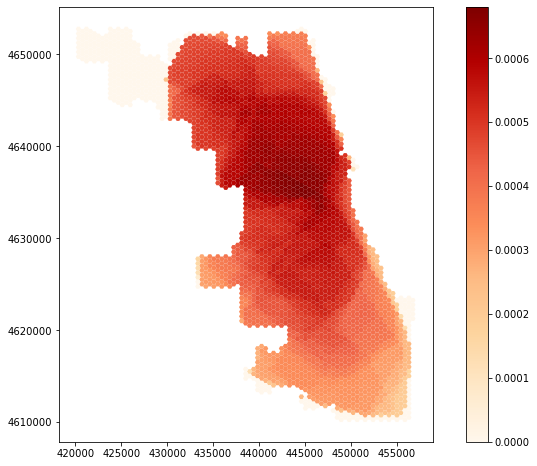

In [48]:
# Display results
import geopandas as gpd
result = gpd.read_file(os.path.join(extract_results_to, "result.geojson"))
result.plot(column="hospital_vents", cmap="OrRd", legend=True, figsize=(12,8))

This example illustrated how to run a more complex custom program on the CyberGISX environment using CyberGIS-Compute.

Future examples will demonstrate how to run existing maintainers with custom data and how to run custom code that uses custom data.